Exercises
Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
################################################### Acquire #########################################################
# importing of all needed libraries and modules.  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.impute import SimpleImputer
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import warnings
warnings.filterwarnings("ignore")
from env import host, user, password
import wrangle
from scipy import stats
from scipy.stats import pearsonr, spearmanr

In [3]:
train, validate, test = wrangle.wrangle_zillow()

In [4]:
train.head()

,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
51993,3.0,2.0,1274.0,237392.0,1971.0,2848.76,6059.0,46.0
1286814,1.0,2.0,2062.0,122766.0,1949.0,1647.70,6037.0,68.0
772171,3.0,2.0,1243.0,206365.0,1957.0,2406.12,6059.0,60.0
279343,3.0,2.0,1472.0,119060.0,1977.0,1173.36,6059.0,40.0
1558636,4.0,2.5,2713.0,319246.0,1973.0,3980.50,6059.0,44.0


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [6]:
#Scale the following: bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxamount                  

In [7]:
train_scaled = train.copy()

# MinMaxScaler()

In [8]:
# make, fit, use:
columns_to_scale = ['Bedrooms', 'Bathrooms', 'Square_Feet', 'Taxes']  
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [9]:
train.columns

Index(['Bedrooms', 'Bathrooms', 'Square_Feet', 'Total_Home_Value',
       'Year_Built', 'Taxes', 'Region', 'Age'],
      dtype='object')

In [10]:
train_scaled.head(2)

,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
51993,0.500000,0.4,0.130124,237392.0,1971.0,0.031314,6059.0,46.0
1286814,0.166667,0.4,0.210672,122766.0,1949.0,0.018082,6037.0,68.0


Text(0, 0.5, 'Count')

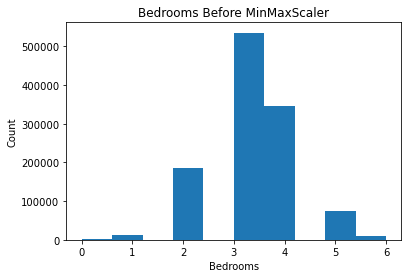

In [11]:
plt.hist(train.Bedrooms)
plt.title('Bedrooms Before MinMaxScaler')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

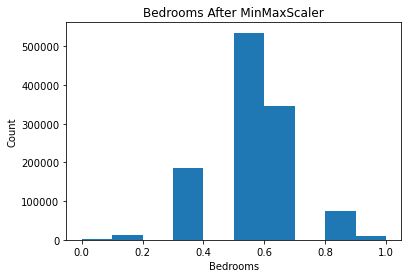

In [12]:
plt.hist(train_scaled.Bedrooms)
plt.title('Bedrooms After MinMaxScaler')
plt.xlabel('Bedrooms')
plt.ylabel('Count')


In [13]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

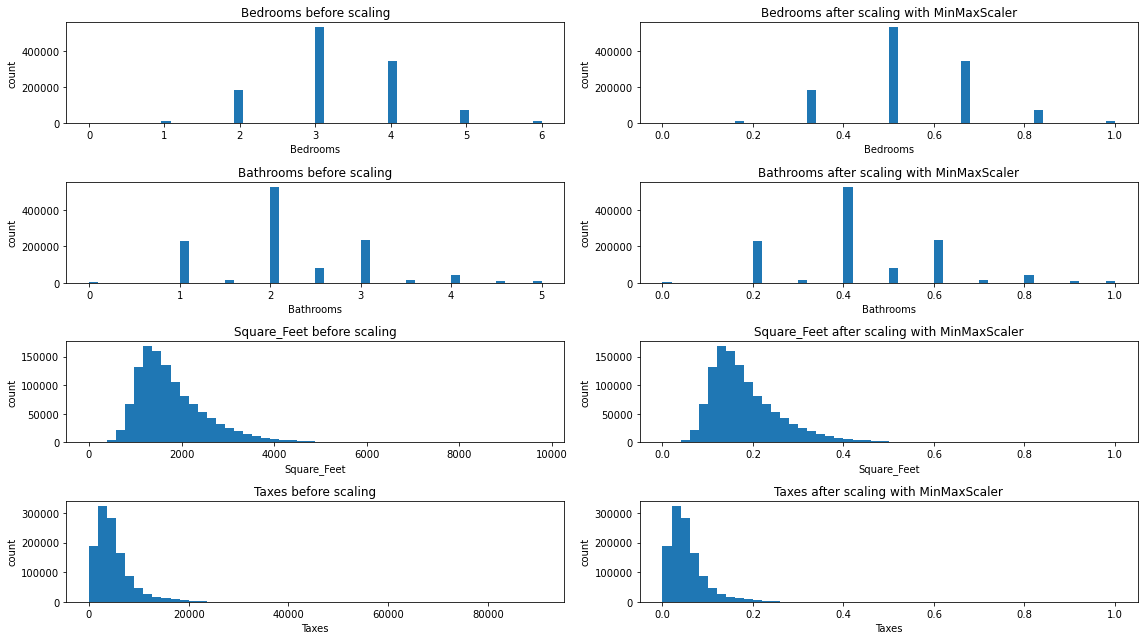

In [14]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

# StandardScaler()

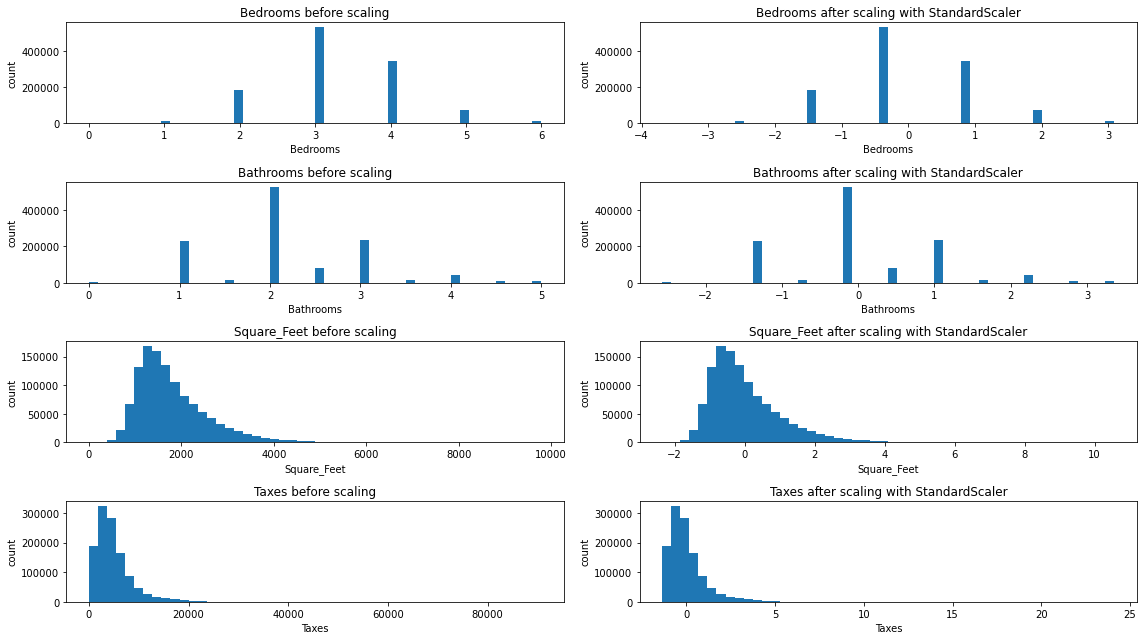

In [15]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

# RobustScaler()

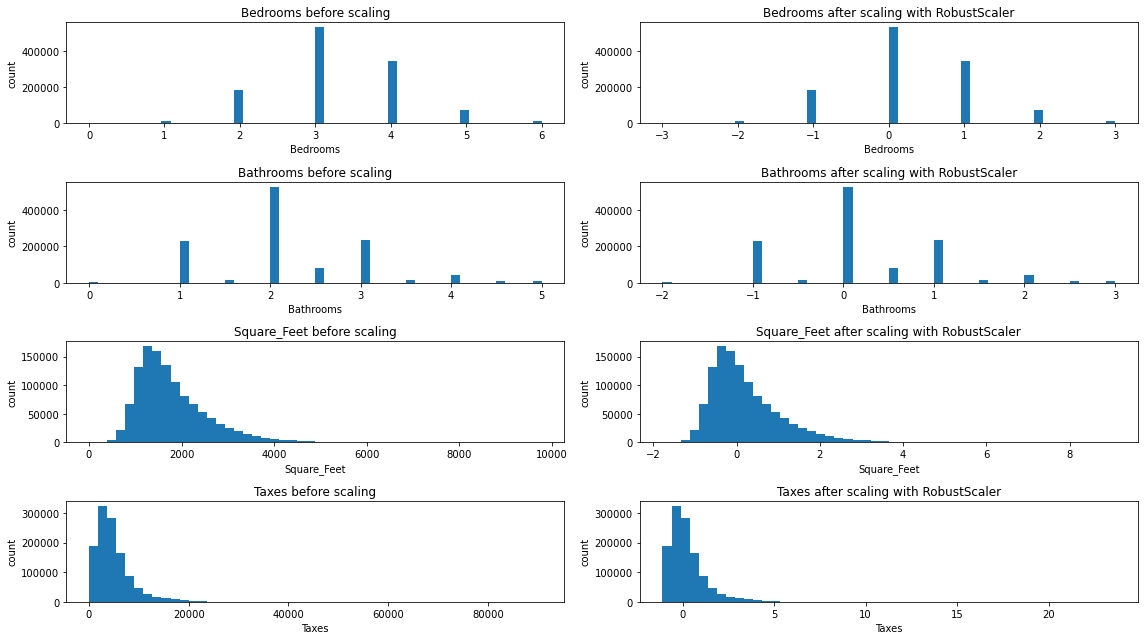

In [16]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [17]:
scaler = MinMaxScaler()
original_data = train[['Taxes']]
scaled_data = scaler.fit_transform(original_data)

In [18]:
scaled_data[:5]

array([[0.03131359],
       [0.01808208],
       [0.02643724],
       [0.01285651],
       [0.04378144]])

In [19]:
original_data[:5]

,Taxes
51993,2848.76
1286814,1647.70
772171,2406.12
279343,1173.36
1558636,3980.50


In [20]:
scaler.inverse_transform(scaled_data)[:5]

array([[2848.76],
       [1647.7 ],
       [2406.12],
       [1173.36],
       [3980.5 ]])

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

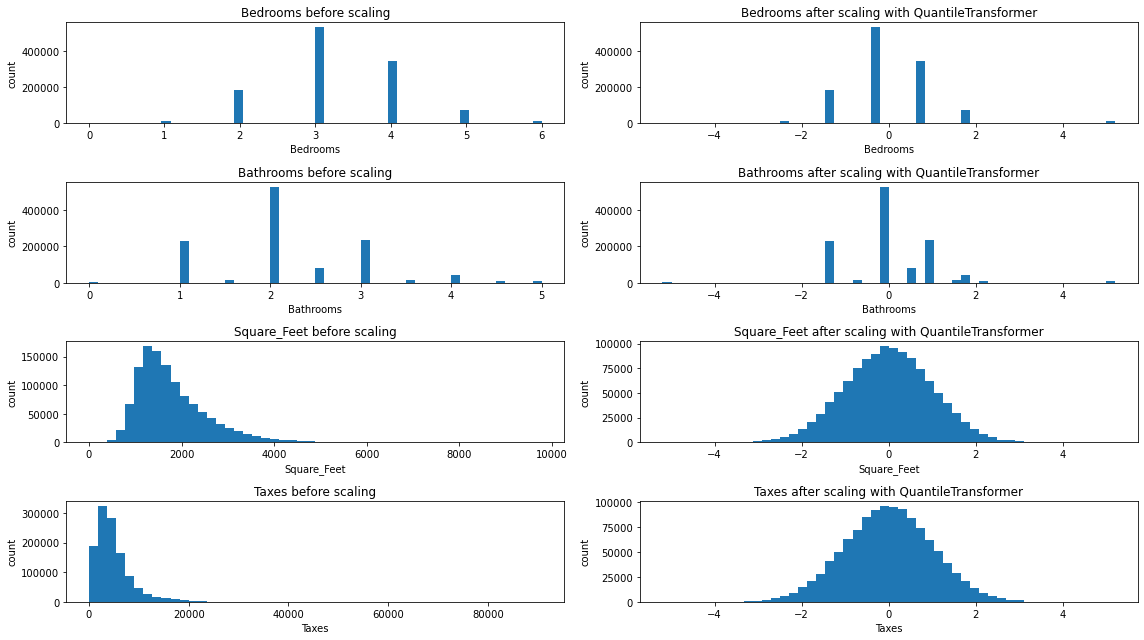

In [21]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

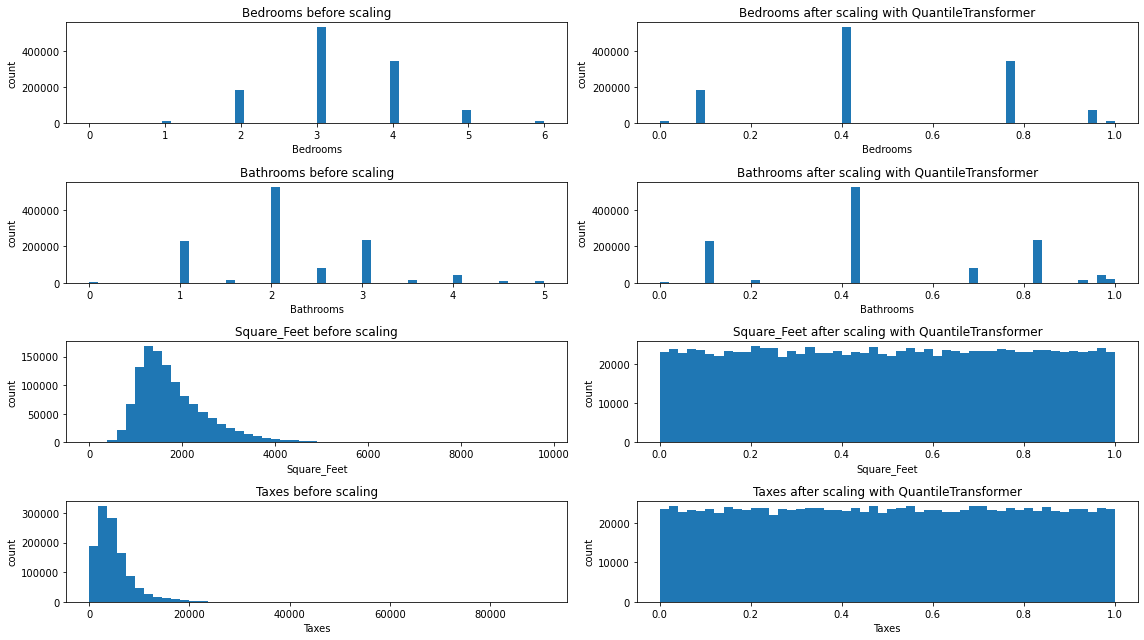

In [22]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [23]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale = ['Bedrooms', 'Bathrooms', 'Square_Feet', 'Taxes'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [24]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)


In [25]:
scaler


MinMaxScaler()

In [26]:
train_scaled

,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
51993,0.500000,0.4,0.130124,237392.0,1971.0,0.031314,6059.0,46.0
1286814,0.166667,0.4,0.210672,122766.0,1949.0,0.018082,6037.0,68.0
772171,0.500000,0.4,0.126955,206365.0,1957.0,0.026437,6059.0,60.0
279343,0.500000,0.4,0.150363,119060.0,1977.0,0.012857,6059.0,40.0
1558636,0.666667,0.5,0.277216,319246.0,1973.0,0.043781,6059.0,44.0
...,...,...,...,...,...,...,...,...
1308954,0.666667,0.4,0.181744,439660.0,1968.0,0.057121,6037.0,49.0
551670,0.500000,0.6,0.243075,222584.0,1991.0,0.039133,6037.0,26.0
1073071,0.500000,0.4,0.171829,283358.0,1952.0,0.037885,6037.0,65.0
31730,0.666667,0.6,0.355821,608500.0,2001.0,0.091183,6037.0,16.0


In [27]:
validate_scaled


,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
1461740,0.500000,0.4,0.123582,206025.0,1959.0,0.029411,6059.0,58.0
1550520,0.500000,0.4,0.122866,127703.0,1963.0,0.018403,6059.0,54.0
1092455,0.500000,0.2,0.106307,233426.0,1950.0,0.047997,6037.0,67.0
2098398,0.666667,0.6,0.309721,556761.0,2000.0,0.084068,6037.0,17.0
1318770,0.333333,0.2,0.077072,150665.0,1963.0,0.023839,6037.0,54.0
...,...,...,...,...,...,...,...,...
1326628,0.666667,0.6,0.161402,422500.0,1957.0,0.063724,6037.0,60.0
1540790,0.666667,0.4,0.169682,432964.0,1957.0,0.058330,6037.0,60.0
545544,0.833333,0.8,0.314934,531998.0,2004.0,0.088144,6037.0,13.0
1106242,0.833333,0.5,0.303690,119458.0,1964.0,0.017320,6059.0,53.0


In [28]:
test_scaled


,Bedrooms,Bathrooms,Square_Feet,Total_Home_Value,Year_Built,Taxes,Region,Age
245928,0.500000,0.3,0.127670,165226.0,1964.0,0.024375,6059.0,53.0
1117600,0.833333,0.6,0.378616,294091.0,1972.0,0.037741,6059.0,45.0
2036607,0.666667,0.6,0.187570,323492.0,1984.0,0.050665,6037.0,33.0
882609,0.666667,0.6,0.338546,638102.0,2003.0,0.098530,6037.0,14.0
239936,0.333333,0.4,0.129919,98612.0,1948.0,0.013348,6037.0,69.0
...,...,...,...,...,...,...,...,...
1153688,0.333333,0.2,0.089134,415000.0,1952.0,0.055519,6037.0,65.0
1693047,0.500000,0.4,0.256056,1332000.0,1943.0,0.163200,6037.0,74.0
110654,0.500000,0.2,0.172340,116880.0,1938.0,0.024134,6037.0,79.0
1121460,0.333333,0.2,0.099765,392983.0,1938.0,0.053318,6037.0,79.0
